## Final Project Submission

Please fill out:
* Student name: Paul Njuguna Kamau
* Student pace: full time
* Scheduled project review date/time: 12/03/23 by 12pm
* Instructor name: **Anthony Muiko**
* Blog post URL:


# 1. BUSINESS UNDERSTANDING 
### 1.1 Problem Statement

Microsoft sees all the big companies creating original video content and they want to get in on the production. They have decided to create a new movie studio, but they don’t know anything about creating movies. I am charged with exploring what types of films that are currently doing the best at the box office. I will then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

Film production is a very expensive venture but it can be very profitable when the movie produced entices the targeted audience. You may find that certain kind of genres in films are more preferred to others. Some films may be exciting to the audience but due to their runtime length of minutes they may dislike them.
This project aims to explore the kind of movies that are doing well at the box office, and recommend those types of films to the head of Microsoft's new movie studio.
We will also explore the current best movie studios from where we can draw our insights.

### 1.2 Objectives.
 1. Establish the films that are doing best in the box office.
 2. Investigate which movie studio earns the highest returns
 3. Investigate the relationship between the genres and number of votes.
 

## 1.3 Data Understanding

For this project we will work with two sets of data; 
- The movie gross data in the path (http://localhost:8888/edit/data/bom.movie_gross.csv) 
Each record (row) in this dataset represents information about a film including the title, studio, domestic gross,
foreign gross and the year it was produced. Each feature (column) in this dataset is some attribute of that film. You can view the file  in this repository for a full explanation of all variables in this dataset.
- A database data im.db in the path (http://localhost:8888/edit/data/im.db)
 this database contain the following  8 tables
 
 Table Names
 
1.	movie_basics
2.	directors
3.	known_for
4.	movie_akas
5.	movie_ratings
6.	persons
7.	principals
8.	writers

for this project we will work with movie basics table and the movie rating tables to help fulfil our objectives for the study.

Each of the following three datasets will help us draw valuable insights and satisfy our objectives.

## 2. Data Preparations.


In [69]:
# Import necessary libraries.
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2.1 load data with pandas
 we will start by first loading ('bom.movie_gross.csv')

In [70]:
movie_gross = pd.read_csv('data/bom.movie_gross.csv')
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [71]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [72]:
"""
We can see that there are missing values in the 
studio, domestic_gross, and foreign_gross columns
since there are 3387 total rows and each of those
columns contains fewer than 3387 non-null values

The data types seem to line up with what we expect,
except the foreign_gross column which we can later 
convert to float during analysis.
"""

'\nWe can see that there are missing values in the \nstudio, domestic_gross, and foreign_gross columns\nsince there are 3387 total rows and each of those\ncolumns contains fewer than 3387 non-null values\n\nThe data types seem to line up with what we expect,\nexcept the foreign_gross column which we can later \nconvert to float during analysis.\n'

In [73]:
# checking for duplicate values in the title column
movie_gross.duplicated().sum()

0

### 2.2 Cleaning the data
The strategies we can adapt to deal with the missing values are either;

1. To fill in missing values (either using another value from the column,
    e.g. the mean or mode, or using some other value like "Unknown")

2. Drop rows with missing values

The first column we'll deal with is the foreign_gross column. We'll begin by examining this column more closely
In the cell below:


In [74]:
# we can first check the percentage of the missing value
print('Percentage of Null foreign_gross Values:', 
      len(movie_gross[movie_gross.foreign_gross.isna()])/ len(movie_gross))

Percentage of Null foreign_gross Values: 0.3985828166519043


In [75]:
# checking closely the columns with Null values

movie_gross.loc[movie_gross['foreign_gross'].isna()== True].head()

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
280,Last Train Home,Zeit.,288000.0,NaN,2010


In [76]:
# formating the column values to remove unnecessary commas.

movie_gross['foreign_gross'] = movie_gross['foreign_gross'].replace(',', '', regex=True).astype(float)

In [77]:
# cheking the general statistics of the dataframe
movie_gross.describe()

,domestic_gross,foreign_gross,year
count,3.359000e+03,2.037000e+03,3387.000000
mean,2.874585e+07,7.487281e+07,2013.958075
std,6.698250e+07,1.374106e+08,2.478141
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.200000e+05,3.700000e+06,2012.000000
50%,1.400000e+06,1.870000e+07,2014.000000
75%,2.790000e+07,7.490000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


Mean of foreign_gross is: 74872810.15046637
Median of foreign_gross is: 18700000.0


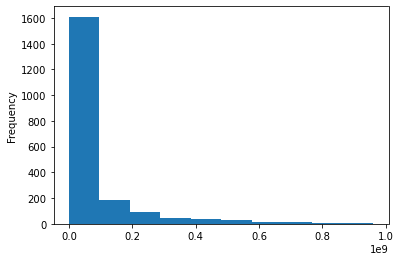

In [78]:
# Checking the distribution of foreign_gross using a histogram

mean_foreign_gross = movie_gross['foreign_gross'].mean()
median_foreign_gross = movie_gross['foreign_gross'].median()
movie_gross['foreign_gross'].plot(kind = 'hist')

print("Mean of foreign_gross is: {}".format(mean_foreign_gross))
print("Median of foreign_gross is: {}".format(median_foreign_gross))


In [79]:
# filling the missing values with the meadian.
foreign_gross = movie_gross['foreign_gross'].fillna(movie_gross['foreign_gross'].median())

Mean of foreign_gross is: 74872810.15046637
Median of foreign_gross is: 18700000.0


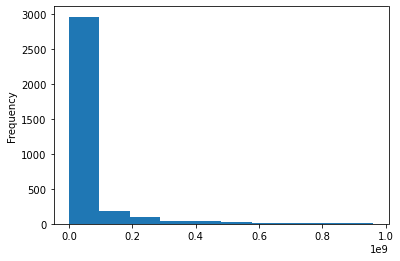

In [80]:
# ploting to recheck how median affected the distribution

mean_foreign_gross = movie_gross['foreign_gross'].mean()
median_foreign_gross = movie_gross['foreign_gross'].median()
foreign_gross.plot(kind = 'hist')

print("Mean of foreign_gross is: {}".format(mean_foreign_gross))
print("Median of foreign_gross is: {}".format(median_foreign_gross))


In [81]:
# checking general statistics
foreign_gross.describe()

count    3.387000e+03
mean     5.248329e+07
std      1.100461e+08
min      6.000000e+02
25%      1.160000e+07
50%      1.870000e+07
75%      2.915000e+07
max      9.605000e+08
Name: foreign_gross, dtype: float64

since we want to reserve the data which we need to conduct our analysis we choose to fill with median which has no much impact on the standard deviation.

In [82]:
# replacing the missing null values with the median 
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].fillna(movie_gross['foreign_gross'].median())

In [83]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


#### Next we check on the missing values of domestic_gross column

In [84]:
movie_gross.isna().sum()

title              0
studio             5
domestic_gross    28
foreign_gross      0
year               0
dtype: int64

we can see that there are 28 missing values in the domestic_tax.

let us see some of the missing data.

In [85]:
movie_gross.loc[movie_gross['domestic_gross'].isna()== True].head()

,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,1300000.0,2010
298,Celine: Through the Eyes of the World,Sony,NaN,119000.0,2010
302,White Lion,Scre.,NaN,99600.0,2010
306,Badmaash Company,Yash,NaN,64400.0,2010
327,Aashayein (Wishes),Relbig.,NaN,3800.0,2010


In [86]:
movie_gross['domestic_gross'].describe()

count    3.359000e+03
mean     2.874585e+07
std      6.698250e+07
min      1.000000e+02
25%      1.200000e+05
50%      1.400000e+06
75%      2.790000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

<AxesSubplot:ylabel='Frequency'>

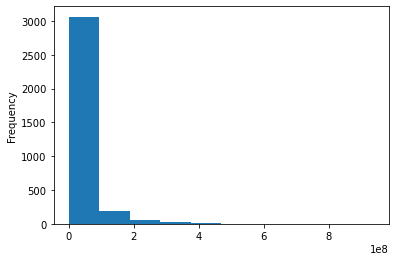

In [87]:
movie_gross['domestic_gross'].plot(kind ='hist')

In [88]:
movie_gross['domestic_gross'] = movie_gross['domestic_gross'].fillna(movie_gross['domestic_gross'].median())
movie_gross['domestic_gross'].describe()

count    3.387000e+03
mean     2.851978e+07
std      6.675093e+07
min      1.000000e+02
25%      1.225000e+05
50%      1.400000e+06
75%      2.750000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

filling with the median has no much effect on the standard deviation

<AxesSubplot:ylabel='Frequency'>

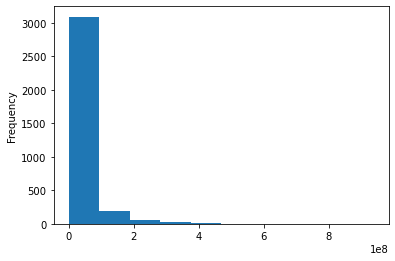

In [89]:
movie_gross['domestic_gross'].plot(kind = 'hist')

#### Next we check on the missing values of studio column

In [90]:
# check sum of null values
movie_gross.isna().sum()

title             0
studio            5
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [91]:
# preview of the null values.
movie_gross.loc[movie_gross['studio'].isna()== True]

,title,studio,domestic_gross,foreign_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000.0,2010
555,Fireflies in the Garden,NaN,70600.0,3300000.0,2011
933,Keith Lemon: The Film,NaN,1400000.0,4000000.0,2012
1862,Plot for Peace,NaN,7100.0,18700000.0,2014
2825,Secret Superstar,NaN,1400000.0,122000000.0,2017


For the missing values in studio we can opt to drop since we cannot replace with the most common 
studio.

In [92]:
# drop the missing values.
movie_gross.dropna(inplace = True)

In [93]:
# checking for more missing values
movie_gross.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

Finally we can work with our data(bom.movie_gross.csv) as it has no null values

### 2.3 loading 'im.db' data with pandas
 

In [94]:
#connecting to the database
conn= sqlite3.connect('data/im.db')

In [95]:
# view the tables in the database
table_name_query = """SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""

pd.read_sql(table_name_query, conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


### 2.4 movie_basics

In [96]:
# selecting to preview the movie basics table.
movie_basics = pd.read_sql('''SELECT * FROM movie_basics ;''',conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [97]:
# checking for null values in the movie basics database
movie_basics.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [98]:
"""
From the above summary we can see that there are missing values in the 
original_title, runtime_minutes, and genres columns.
"""

'\nFrom the above summary we can see that there are missing values in the \noriginal_title, runtime_minutes, and genres columns.\n'

#### 1. cleaning the data

In [99]:
# we can first check the percentage of the missing value
print('Percentage of Null in runtime_minutes Values:', 
len(movie_basics[movie_basics.runtime_minutes.isna()])/ len(movie_basics))

Percentage of Null in runtime_minutes Values: 0.21717620976571053


In [100]:
# check the runtime for most movies
movie_basics['runtime_minutes'].value_counts()

90.0     7131
80.0     3526
85.0     2915
100.0    2662
95.0     2549
         ... 
319.0       1
354.0       1
476.0       1
338.0       1
447.0       1
Name: runtime_minutes, Length: 367, dtype: int64

In [101]:
meandf = movie_basics['runtime_minutes'].mean()
mediandf = movie_basics['runtime_minutes'].median()


print("Mean of runtime_minutes is: {}".format(meandf))
print("Median of foreign_gross is: {}".format(mediandf))


Mean of runtime_minutes is: 86.18724706088021
Median of foreign_gross is: 87.0


In [102]:
# checking the general statistics.
movie_basics['runtime_minutes'].describe()

count    114405.000000
mean         86.187247
std         166.360590
min           1.000000
25%          70.000000
50%          87.000000
75%          99.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

since the mean and media are fairly close we can opt to replace the missing data with the median

In [103]:
# we can join the two tables movie basics and movie ratings using the movie id.
# selecting the most useful columns.
q ='''
SELECT movie_id, original_title, runtime_minutes, genres, averagerating, numvotes
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
    ;
    '''
imdb = pd.read_sql(q,conn)
imdb

,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,Ashad Ka Ek Din,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,NaN,"Comedy,Drama",6.1,13
4,tt0100275,La Telenovela Errante,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,NaN,None,6.6,5


In [104]:
# filling the missing values with the meadian.
imdb['runtime_minutes'] = imdb['runtime_minutes'].fillna(imdb['runtime_minutes'].median())

In [105]:
# checking the summary of the dataframe.
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   original_title   73856 non-null  object 
 2   runtime_minutes  73856 non-null  float64
 3   genres           73052 non-null  object 
 4   averagerating    73856 non-null  float64
 5   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 3.4+ MB


In [106]:
# check the missing value in genres column.
imdb.loc[imdb['genres'].isna()== True].head()

,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes
18,tt0253093,Gangavataran,134.0,None,6.6,8
29,tt0306058,Second Coming,95.0,None,5.5,20
33,tt0326592,The Overnight,88.0,None,7.5,24
37,tt0330811,Regret Not Speaking,91.0,None,6.2,10
38,tt0330987,"Tiden är en dröm, del 2",109.0,None,6.3,6


In [107]:
# check unique value counts.
imdb['genres'].value_counts()

Drama                        11612
Documentary                  10313
Comedy                        5613
Horror                        2692
Comedy,Drama                  2617
                             ...  
Sport,Thriller                   1
Comedy,Sport,Western             1
Action,Music                     1
Comedy,Sci-Fi,Western            1
Documentary,Family,Sci-Fi        1
Name: genres, Length: 923, dtype: int64

Since we cannot replace the genre as it can potray wrong information and all the movies without
original title do not have a genre we can drop the null values.

In [108]:
# Drop the rows that have null values
imdb.dropna(inplace = True)

In [109]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73052 non-null  object 
 1   original_title   73052 non-null  object 
 2   runtime_minutes  73052 non-null  float64
 3   genres           73052 non-null  object 
 4   averagerating    73052 non-null  float64
 5   numvotes         73052 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 3.9+ MB


In [110]:
# checking for duplicates
imdb.duplicated().sum()

0

Therefore the movie basic data is now clean to work with

### 2.5 movie_ratings


In [111]:
# selecting to preview the movie ratings table.
movie_ratings = pd.read_sql('''SELECT * FROM movie_ratings ;''',conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [112]:
 #checking for null values in the movie basics database
movie_ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [113]:
movie_ratings.duplicated().sum()

0

In [114]:
"""
As seen above the data on movie ratings has no missing data and 
there are no duplicated values present in the data.
Therefore we can proceed with the dataset.
"""

'\nAs seen above the data on movie ratings has no missing data and \nthere are no duplicated values present in the data.\nTherefore we can proceed with the dataset.\n'

## 3. Data analysis.


### 3.1 bom.movie dataset

In [115]:
#  preview the dataset
imdb

,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,Ashad Ka Ek Din,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,91.0,"Comedy,Drama",6.1,13
4,tt0100275,La Telenovela Errante,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,86.0,Documentary,6.2,5
73851,tt9913084,Diabolik sono io,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,91.0,Documentary,8.5,8


In [116]:
# investigate the years of production
movie_gross['year'].value_counts()

2015    450
2016    436
2012    399
2011    398
2014    394
2013    350
2010    327
2017    320
2018    308
Name: year, dtype: int64

The year of production ranges from 2015 to 2018

In [117]:
# which movie studio has the highest domestic gross
studio_highest_gross = movie_gross.domestic_gross.groupby(movie_gross['studio']).max()
studio_highest_gross = studio_highest_gross.sort_values(ascending=False).head(10)
studio_highest_gross

studio
BV         936700000.0
Uni.       652300000.0
WB         448100000.0
LGF        424700000.0
Sony       404500000.0
Fox        363100000.0
P/DW       352400000.0
WB (NL)    327500000.0
Par.       312400000.0
Sum.       300500000.0
Name: domestic_gross, dtype: float64

Studio BV has the highest  domestic_gross of 936700000.0 followed by Uni with 652300000.0 and WB with 448100000.0

In [118]:
# which movie studio has the highest foreign gross
studio_highest_fgross = movie_gross.foreign_gross.groupby(movie_gross['studio']).max()
studio_highest_fgross = studio_highest_fgross.sort_values(ascending=False).head(10)
studio_highest_fgross

studio
WB         960500000.0
BV         946400000.0
Uni.       891800000.0
HC         867600000.0
Par.       858600000.0
Sony       804200000.0
P/DW       771400000.0
WB (NL)    718100000.0
Fox        715900000.0
WGUSA      577700000.0
Name: foreign_gross, dtype: float64

studio WB has the highest foreign gross with 960500000.0 followed by BV with 946400000.0 and Uni with 891800000.0

### 3.2 The movie database 'Im.db'

In [119]:
# preview the tables.
imdb

,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,Ashad Ka Ek Din,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,91.0,"Comedy,Drama",6.1,13
4,tt0100275,La Telenovela Errante,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,86.0,Documentary,6.2,5
73851,tt9913084,Diabolik sono io,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,91.0,Documentary,8.5,8


In [120]:
# identifying the movies genres with the highest ratings.
highest_ratings = imdb.averagerating.groupby(imdb['genres']).max()
highest_ratings = highest_ratings.sort_values(ascending = False).head(12)
highest_ratings

genres
Comedy,Drama                   10.0
Adventure,Comedy               10.0
Documentary,History            10.0
Documentary                    10.0
Crime,Documentary              10.0
Drama                          10.0
Comedy,Documentary              9.8
Documentary,Music               9.8
Action                          9.8
Biography,Documentary,Music     9.8
Biography,Documentary,Drama     9.8
Comedy,Documentary,Sport        9.7
Name: averagerating, dtype: float64

In [121]:
# identifying the movies genres with the highest votes.
highest_votes = imdb.numvotes.groupby(imdb['genres']).max()
highest_votes = highest_votes.sort_values(ascending = False).head(12)
highest_votes

genres
Action,Adventure,Sci-Fi     1841066
Action,Thriller             1387769
Adventure,Drama,Sci-Fi      1299334
Drama,Western               1211405
Biography,Crime,Drama       1035358
Mystery,Thriller            1005960
Action,Adventure,Comedy      948394
Action,Adventure,Fantasy     784780
Drama,Mystery,Thriller       761592
Adventure,Family,Fantasy     719629
Drama,Sci-Fi,Thriller        710018
Adventure,Drama,Fantasy      691835
Name: numvotes, dtype: int64

In [122]:
# identifying the movies runtime minutes with the highest ratings.
runtime = imdb.averagerating.groupby(imdb['runtime_minutes']).max()
runtime = runtime.sort_values(ascending = False).head(12)
runtime

runtime_minutes
93.0     10.0
129.0    10.0
48.0     10.0
99.0     10.0
31.0     10.0
100.0    10.0
52.0     10.0
59.0     10.0
65.0     10.0
77.0     10.0
91.0     10.0
72.0     10.0
Name: averagerating, dtype: float64

In [123]:
# identifying the movies runtime minutes with the highest votes.
runtimev = imdb.numvotes.groupby(imdb['runtime_minutes']).max()
runtimev= runtimev.sort_values(ascending = False).head(12)
runtimev

runtime_minutes
148.0    1841066
164.0    1387769
169.0    1299334
165.0    1211405
143.0    1183655
180.0    1035358
138.0    1005960
121.0     948394
108.0     820847
142.0     795227
136.0     784780
120.0     780910
Name: numvotes, dtype: int64

In [124]:
# identify the  movies with the highest ratings.
best_movies = imdb.averagerating.groupby(imdb['original_title']).max()
best_movies = best_movies.sort_values(ascending = False).head(20)
best_movies

original_title
The Dark Knight: The Ballad of the N Word                          10.0
Atlas Mountain: Barbary Macaques - Childcaring Is the Man's Job    10.0
Dog Days in the Heartland                                          10.0
Calamity Kevin                                                     10.0
A Dedicated Life: Phoebe Brand Beyond the Group                    10.0
Fly High: Story of the Disc Dog                                    10.0
I Was Born Yesterday!                                              10.0
Ellis Island: The Making of a Master Race in America               10.0
Exteriores: Mulheres Brasileiras na Diplomacia                     10.0
Renegade                                                           10.0
Requiem voor een Boom                                              10.0
Freeing Bernie Baran                                               10.0
Hercule contre Hermès                                              10.0
All Around Us                                    

In [125]:
# Checking all the films with high average rating.
best_genres = imdb.loc[imdb['averagerating'] > 9.5 ]
best_genres

,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes
649,tt10121022,Freie Räume,102.0,Documentary,9.7,7
669,tt10146728,Foosballers,91.0,"Comedy,Documentary,Sport",9.7,22
702,tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,52.0,Documentary,10.0,5
705,tt10177960,Dreaming of a Vetter World,77.0,Documentary,9.8,6
730,tt10204276,Soldiers Without Guns,92.0,Documentary,9.7,30
...,...,...,...,...,...,...
73664,tt9760512,D/O Parvathamma,91.0,Action,9.6,427
73696,tt9787524,DOSED,82.0,Documentary,9.7,72
73741,tt9820678,Moscow we will lose,51.0,Documentary,9.9,18
73797,tt9866708,Wild Karnataka,53.0,Documentary,9.9,10


### 4. Data Visualization

1. From the first objective we will plot a bar graph to show which is the best filming studio

In [126]:
#creating a dataFrame
studio_highest_gross = studio_highest_gross.rename_axis('studio')
studio_highest_gross=studio_highest_gross.reset_index(name='domestic_gross')
studio_highest_gross

,studio,domestic_gross
0,BV,936700000.0
1,Uni.,652300000.0
2,WB,448100000.0
3,LGF,424700000.0
4,Sony,404500000.0
5,Fox,363100000.0
6,P/DW,352400000.0
7,WB (NL),327500000.0
8,Par.,312400000.0
9,Sum.,300500000.0


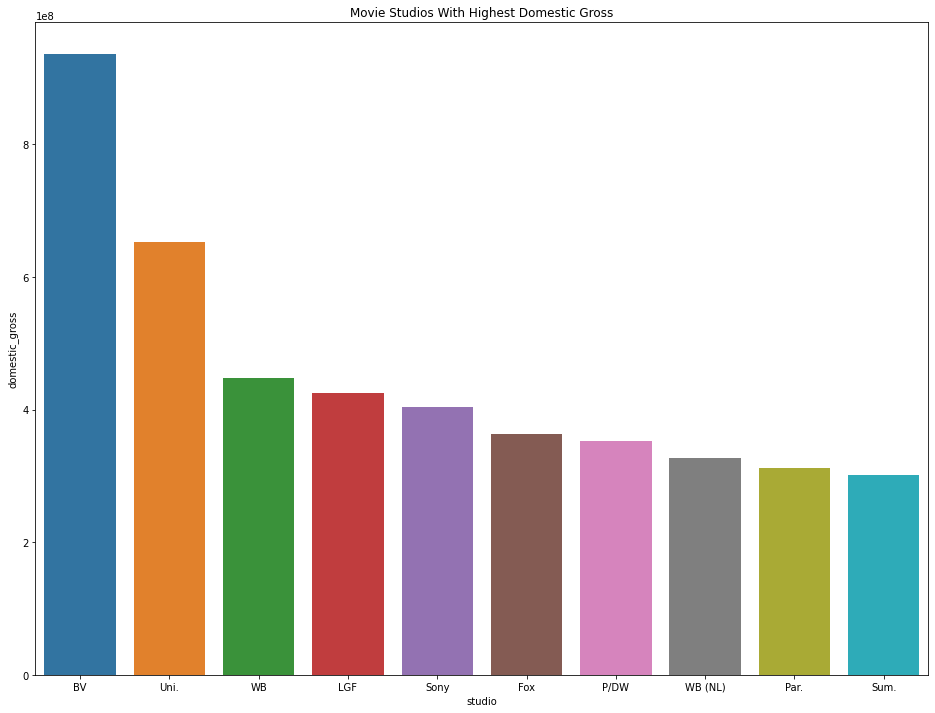

In [127]:
# plotting
plt.figure(figsize=(16,12))
barplot = sns.barplot(x='studio',y='domestic_gross', data=studio_highest_gross)
barplot.set(title='Movie Studios With Highest Domestic Gross')
plt.show()

As seen in the visualization BV is the leading studio in domestic gross

In [128]:
#creating a dataframe
studio_highest_fgross = studio_highest_fgross.rename_axis('studio')
studio_highest_fgross=studio_highest_fgross.reset_index(name='foreign_gross')
studio_highest_fgross

,studio,foreign_gross
0,WB,960500000.0
1,BV,946400000.0
2,Uni.,891800000.0
3,HC,867600000.0
4,Par.,858600000.0
5,Sony,804200000.0
6,P/DW,771400000.0
7,WB (NL),718100000.0
8,Fox,715900000.0
9,WGUSA,577700000.0


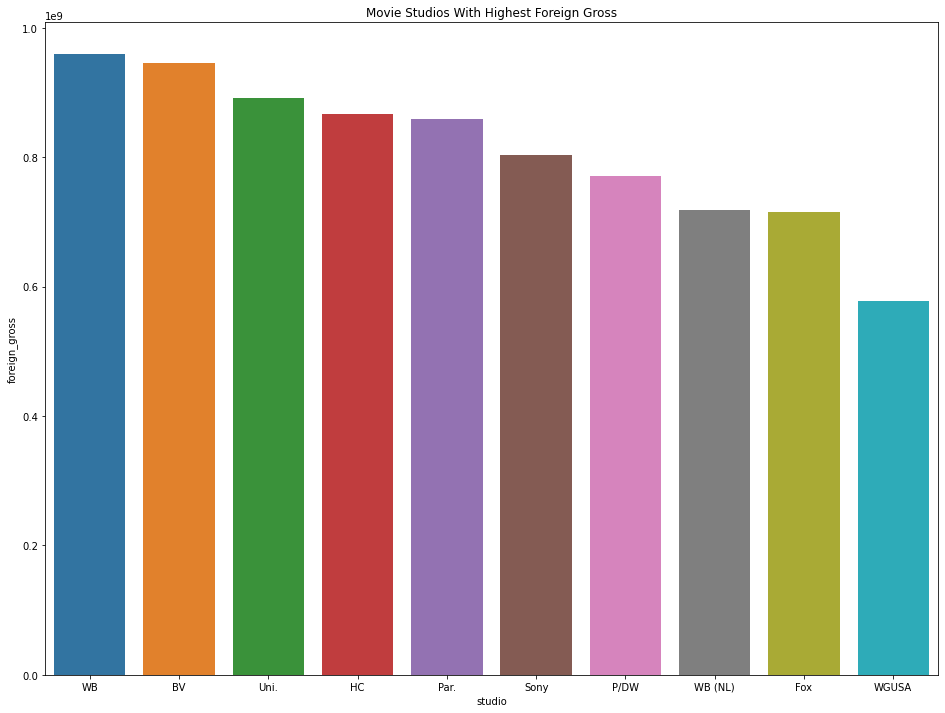

In [129]:
plt.figure(figsize=(16,12))
barplot = sns.barplot(x='studio',y='foreign_gross', data=studio_highest_fgross)
barplot.set(title='Movie Studios With Highest Foreign Gross')
plt.show()

From the visualization it is Very clear that BV is the Best Filming studio that has the high income
for both domestic and foreign gross.

1. From the second objective we will plot a bar graph to show the best runtime_minutes to choose.

In [130]:
# creating a dataframe
runtimev= runtimev.rename_axis('votes')
runtimev= runtimev.reset_index(name='minutes')
runtimev

,votes,minutes
0,148.0,1841066
1,164.0,1387769
2,169.0,1299334
3,165.0,1211405
4,143.0,1183655
5,180.0,1035358
6,138.0,1005960
7,121.0,948394
8,108.0,820847
9,142.0,795227


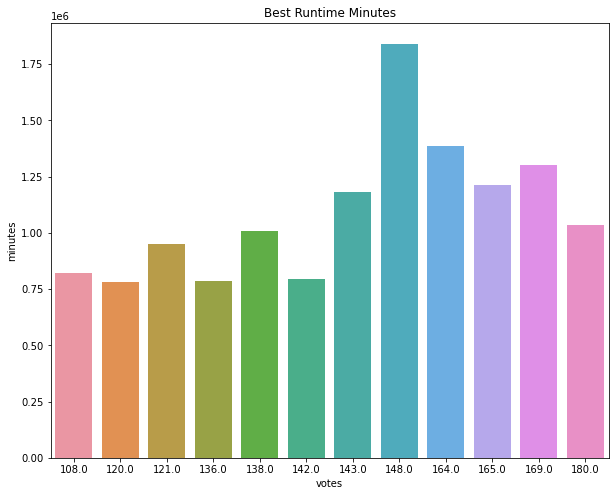

In [131]:
plt.figure(figsize=(10,8))
barplot = sns.barplot(x='votes',y='minutes', data=runtimev)
barplot.set(title='Best Runtime Minutes')
plt.show()

A runtime minute of 148.0 has the highest votes.

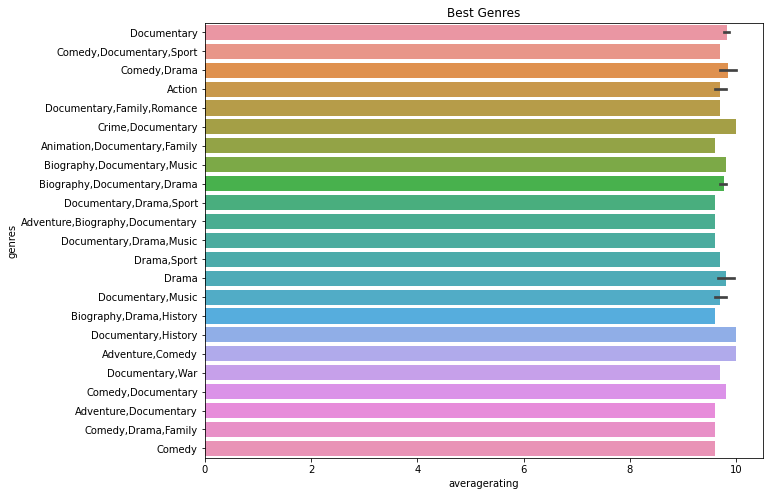

In [132]:
# we can check which movie genres have the highest ratings.
plt.figure(figsize=(10,8))
barplot = sns.barplot(x='averagerating',y='genres', data=best_genres)
barplot.set(title='Best Genres')
plt.show()

In [133]:
# creating a dataframe
highest_votes= highest_votes.rename_axis('genres')
highest_votes= highest_votes.reset_index(name='votes')
highest_votes

,genres,votes
0,"Action,Adventure,Sci-Fi",1841066
1,"Action,Thriller",1387769
2,"Adventure,Drama,Sci-Fi",1299334
3,"Drama,Western",1211405
4,"Biography,Crime,Drama",1035358
5,"Mystery,Thriller",1005960
6,"Action,Adventure,Comedy",948394
7,"Action,Adventure,Fantasy",784780
8,"Drama,Mystery,Thriller",761592
9,"Adventure,Family,Fantasy",719629


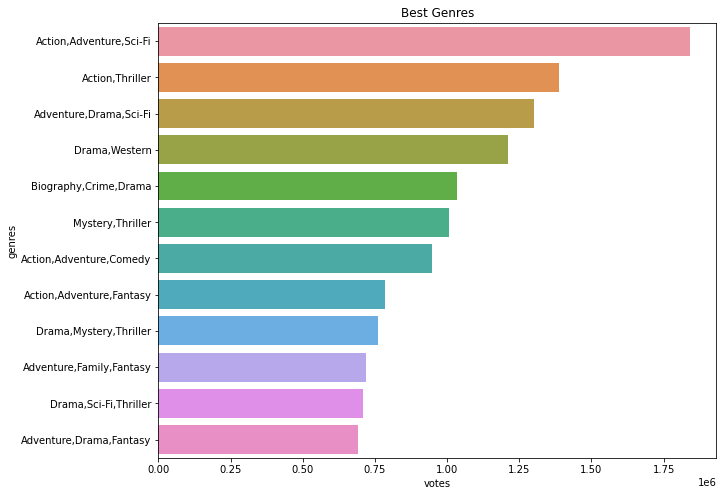

In [134]:
# movie genres with the highest vote.
plt.figure(figsize=(10,8))
barplot = sns.barplot(x='votes',y='genres', data=highest_votes)
barplot.set(title='Best Genres')
plt.show()

From the above visualization it is clear that Action, Adventure, Science fiction is the genres with the highest number of votes.

Text(0, 0.5, 'Genres')

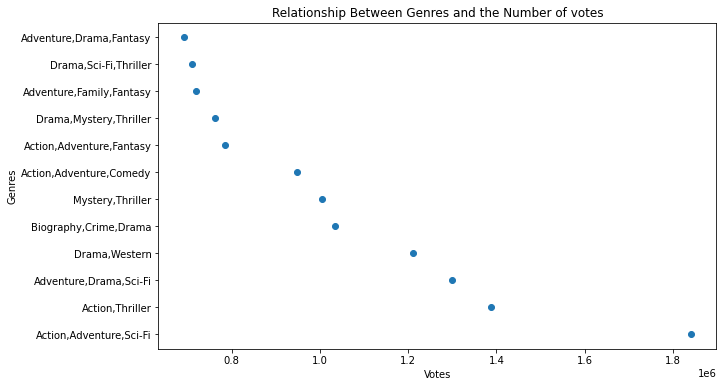

In [135]:
# investigate the relationship between genres and the number of votes of a movie.
scatter_figure, ax = plt.subplots(figsize=(10, 6))
ax.scatter(highest_votes['votes'], highest_votes['genres'])
ax.set_title('Relationship Between Genres and the Number of votes')
ax.set_xlabel('Votes')
ax.set_ylabel('Genres')


The votes increases when approaching action,adventure and Sci-fi genres